# Regression -> Pytorch
- Target
    1. build up sample RNN (construct layer)
    2. optimize RNN 

### Import libraries

In [2]:
import torch
from torch.autograd import Variable
import torch.nn.functional as F
import matplotlib.pyplot as plt

### Create mock data and plot

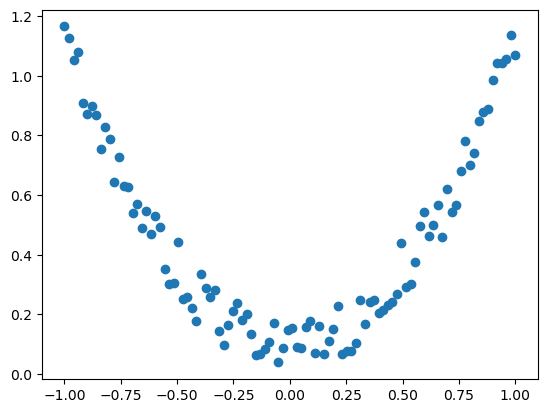

In [20]:
# torch.unsqueeze 把一維變二維 (因為在torch當中只會處理二維數據)
x = torch.unsqueeze(torch.linspace(-1,1,100) , dim=1) # x data (tensor) , shape(100,1)

# pow (次方) ＋ noisy point 
y = x.pow(2) + 0.2*torch.rand(x.size())

# 變成 Variable 形式 (神經網絡只能輸入Variable)
x , y = Variable(x) , Variable(y)

# plt.scatter(x.data.numpy() , y.data.numpy())

### Building Regression Neural Network

In [22]:
# Net inherit torch.nn.Module
class Net(torch.nn.Module):
    # 定義 layer function (hidden)
    # n_feature -> 數據個數 , n_hidden -> hidden layer 神經元個數 , n_output -> output個數
    def __init__(self , n_feature , n_hidden , n_output):
        super(Net,self).__init__()
        # define hidden layer -> Linear function (numbers of input , numbers of output)
        # hidden layer = function(n_input , n_output)
        self.hidden =  torch.nn.Linear(n_feature , n_hidden)
        # output layer = function(n_input , n_output)
        self.predict = torch.nn.Linear(n_hidden , n_output)

    # 向前傳遞 -> 拿Layer來用
    # x -> data
    def forward(self ,x):
        # Activated Function [F.relu] ( hidden layer(x[n_feature]) ) -> n_hidden
        x = F.relu(self.hidden(x))
        # self.predict(x[n_hidden]) -> n_output
        x = self.predict(x)
        return x     

net = Net(1,10,1)
print(net)


Net(
  (hidden): Linear(in_features=1, out_features=10, bias=True)
  (predict): Linear(in_features=10, out_features=1, bias=True)
)


### Optimize Neural Network 

In [ ]:
# torch.optim.{optimizer}({parameter})
# 優化神經網絡參數 -> 傳入神經網絡參數 , learning_rate 
optimizer = torch.optim.SGD(net.parameters() , lr=0.5)

# loss_function (MSE regression problem)
loss_func = torch.nn.MSELoss()


for t in range(100):
    prediction = net(x)

    #loss_func(prediction , real_value) 
    loss = loss_func(prediction , y)

    # 先把神經網絡裡面的參數的梯度 -> 0
    optimizer.zero_grad()
    # 誤差反向傳遞 loss => Variable (傳遞給每個節點這次計算出來的梯度)
    loss.backward()
    # 透過 optimizer 優化這些梯度
    optimizer.step()
